# Energy AI Hackathon 2024: Team Entelligence
Authors:
- Atharva Kalamkar, Computational Engineering
- Mihir Yogesh Bendre, Computational Engineering
- Avya Kalra, Computational Engineering
- Muhammad Taha, Computational Engineering
- Muhammad Akmal, PGE

**The University of Texas at Austin, Austin, Texas USA**

Executive Summary,
Workflow Goal,
Workflow Steps

# 1. Importing Libraries and Dataset

In [29]:
#Importing required packages.
import pandas as pd
import numpy as np
import pickle
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from itertools import combinations
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# To get diferent metric scores
from sklearn.metrics import (
    accuracy_score,
)

In [30]:
#Importing the data
dataFile ='HackathonData2024.csv'
data = pd.read_csv(dataFile,index_col=0)

# 2. Data Cleaning / Imputation
- Dropping N/A values for response variable
- Impute missing values
- Normalize data

In [31]:
# Drop N/A values in avg pump difference
data.dropna(subset=['Avg Pump Difference'], inplace=True)

In [32]:
# Assign a unique numerical label to each categorical variable using Label Encoder
le = LabelEncoder()

data['Area'] = le.fit_transform(data['Area'])
data['Fluid System'] = le.fit_transform(data['Fluid System'])
data['Development Strategy'] = le.fit_transform(data['Development Strategy'])
data['CODEV_POSITION'] = le.fit_transform(data['CODEV_POSITION'])
data['CODEV_FORMATION_POSITION'] = le.fit_transform(data['CODEV_FORMATION_POSITION'])


In [33]:
# Normalize data
scaler = MinMaxScaler()

# Fit and transform the entire DataFrame
normalized_data = scaler.fit_transform(data)

# Convert the normalized data back to a DataFrame
data = pd.DataFrame(normalized_data, columns=data.columns)

In [34]:
# Pre imputed data
data.describe()

,Avg Pump Difference,Area,Lateral Length,Fluid System,TVD,Development Strategy,DELAYED,BOUND_CODE,CODEV_POSITION,CODEV_FORMATION_POSITION,...,CODEV_3000_AVG_TVD_DIST,CODEV_3000_AVG_WELL_AGE,CODEV_3000_MEDIAN_WELL_AGE,CODEV_3000_WELL_COUNT,Pressure Gradient (psi/ft) new,Soak Time,Avg Open Pressure,SD Open Pressure,Avg Close Pressure,SD Close Pressure
count,333.000000,333.000000,333.000000,333.000000,329.000000,333.000000,333.000000,333.000000,333.000000,333.000000,...,333.000000,333.000000,333.000000,333.000000,331.000000,333.000000,327.000000,327.000000,332.000000,332.000000
mean,0.270520,0.444645,0.555877,0.191191,0.524380,0.298298,0.714715,0.890495,0.360360,0.261261,...,0.162869,0.523199,0.475486,0.157723,0.430015,0.162489,0.566773,0.068608,0.619906,0.340903
std,0.187205,0.266395,0.151257,0.257061,0.257537,0.241884,0.452230,0.253909,0.480827,0.439983,...,0.191080,0.110829,0.105588,0.173221,0.175004,0.149096,0.205880,0.087860,0.209693,0.172433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.127357,0.233333,0.484277,0.000000,0.298799,0.000000,0.000000,0.900080,0.000000,0.000000,...,0.012813,0.510511,0.459184,0.043478,0.283829,0.040082,0.429562,0.029204,0.492576,0.215193
50%,0.231320,0.433333,0.503145,0.000000,0.472973,0.333333,1.000000,0.990989,0.000000,0.000000,...,0.109823,0.510511,0.459184,0.130435,0.419265,0.117163,0.551717,0.049000,0.641925,0.334490
75%,0.361831,0.666667,0.654088,0.333333,0.804805,0.500000,1.000000,0.999990,1.000000,1.000000,...,0.236730,0.533033,0.469388,0.217391,0.559753,0.227133,0.713690,0.074897,0.770585,0.440471
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
# Impute data using KNNImputer
response = 'Avg Pump Difference'

# Separate the features for imputation
features_for_imputation = data.drop(columns=[response])

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=3)

# Impute missing values for features
imputed_features = pd.DataFrame(imputer.fit_transform(features_for_imputation), columns=features_for_imputation.columns)

# Combine the imputed features with the response variable
data = pd.concat([imputed_features, data[response]], axis=1)

In [36]:
# Post imputed data
data.describe()

,Area,Lateral Length,Fluid System,TVD,Development Strategy,DELAYED,BOUND_CODE,CODEV_POSITION,CODEV_FORMATION_POSITION,PARENT_CODEV_1050_WELL_COUNT,...,CODEV_3000_AVG_WELL_AGE,CODEV_3000_MEDIAN_WELL_AGE,CODEV_3000_WELL_COUNT,Pressure Gradient (psi/ft) new,Soak Time,Avg Open Pressure,SD Open Pressure,Avg Close Pressure,SD Close Pressure,Avg Pump Difference
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,...,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.444645,0.555877,0.191191,0.527899,0.298298,0.714715,0.890495,0.360360,0.261261,0.321321,...,0.523199,0.475486,0.157723,0.429853,0.162489,0.568119,0.068064,0.620243,0.341042,0.270520
std,0.266395,0.151257,0.257061,0.258648,0.241884,0.452230,0.253909,0.480827,0.439983,0.203868,...,0.110829,0.105588,0.173221,0.174564,0.149096,0.205221,0.087169,0.209467,0.172192,0.187205
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233333,0.484277,0.000000,0.301802,0.000000,0.000000,0.900080,0.000000,0.000000,0.200000,...,0.510511,0.459184,0.043478,0.283877,0.040082,0.431721,0.029155,0.493801,0.215475,0.127357
50%,0.433333,0.503145,0.000000,0.487988,0.333333,1.000000,0.990989,0.000000,0.000000,0.300000,...,0.510511,0.459184,0.130435,0.419265,0.117163,0.552746,0.048510,0.642634,0.334837,0.231320
75%,0.666667,0.654088,0.333333,0.809309,0.500000,1.000000,0.999990,1.000000,1.000000,0.400000,...,0.533033,0.469388,0.217391,0.559553,0.227133,0.714874,0.074334,0.769267,0.439885,0.361831
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3. Data Overview

- Observations
- Sanity checks

In [37]:
# Check how the data looks like
data.head()

,Area,Lateral Length,Fluid System,TVD,Development Strategy,DELAYED,BOUND_CODE,CODEV_POSITION,CODEV_FORMATION_POSITION,PARENT_CODEV_1050_WELL_COUNT,...,CODEV_3000_AVG_WELL_AGE,CODEV_3000_MEDIAN_WELL_AGE,CODEV_3000_WELL_COUNT,Pressure Gradient (psi/ft) new,Soak Time,Avg Open Pressure,SD Open Pressure,Avg Close Pressure,SD Close Pressure,Avg Pump Difference
0,0.000000,0.503145,0.0,0.921922,0.000000,1.0,0.999000,0.0,0.0,0.2,...,0.510511,0.459184,0.000000,0.759727,0.019527,0.842860,0.076784,0.799156,0.255725,0.090496
1,0.000000,0.503145,0.0,0.921922,0.000000,1.0,0.999000,0.0,0.0,0.2,...,0.510511,0.459184,0.000000,0.777598,0.053443,0.841193,0.073942,0.884038,0.494275,0.032628
2,0.033333,0.547170,0.0,0.337838,0.500000,0.0,0.009001,1.0,0.0,0.6,...,0.578078,0.459184,0.434783,0.343463,0.019527,0.541036,0.039102,0.353020,0.363723,0.164602
3,0.066667,0.000000,0.0,0.585586,0.333333,1.0,0.900089,0.0,0.0,0.4,...,0.525526,0.469388,0.043478,0.270124,0.329908,0.799933,0.035019,0.732338,0.387087,0.251020
4,0.100000,0.628931,0.0,0.903904,0.000000,1.0,0.999900,0.0,0.0,0.0,...,0.833333,0.750000,0.130435,0.605109,0.006166,0.648817,0.062230,0.539955,0.295108,0.064255


In [38]:
# Check data size
data.shape

(333, 40)

# 4. Feature Engineering / Parameter Importance

We use a Kendall correlation matrix as our rank-based correlation method since it is suitable for use with label-encoded categorical variables. It does not assume linearity and is generally less sensitive to outliers, so it is ideal for our case.

Top 4 Most Correlated with Avg Pump Difference:
Pressure Gradient (psi/ft) new    0.377964
Avg Open Pressure                 0.360885
Fluid System                      0.295313
Avg Close Pressure                0.273282
Name: Avg Pump Difference, dtype: float64


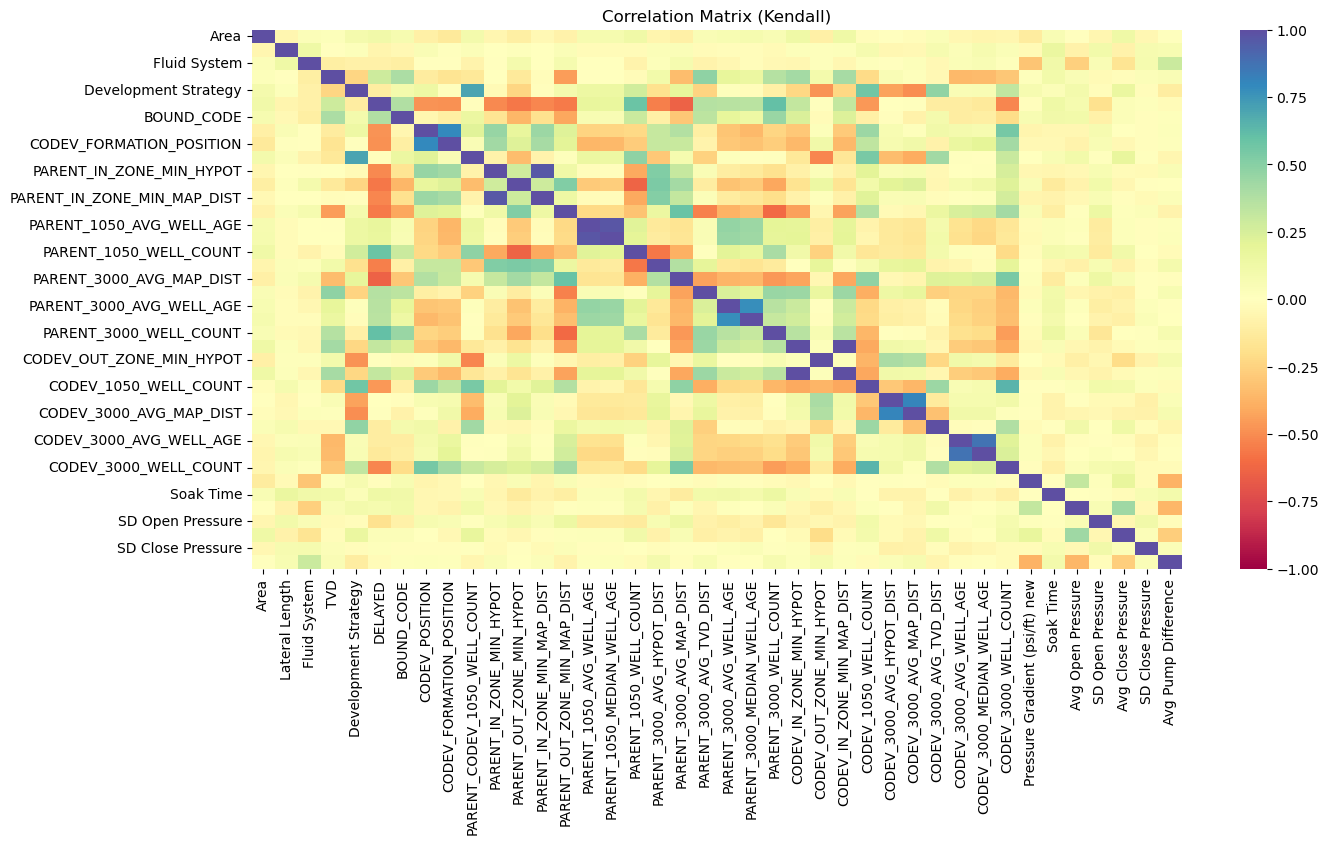

In [39]:
# Calculate Kendall correlation matrix
correlation_matrix = data.corr(method='kendall')

# Filter out the 'Avg Pump Difference' row
correlation_with_avg_diff = correlation_matrix.loc['Avg Pump Difference']

# Get the top 5 most correlated features
top_correlations = correlation_with_avg_diff.abs().sort_values(ascending=False)[1:5]

# Print the top 5 most correlated features
print(f'Top 4 Most Correlated with Avg Pump Difference:')
print(top_correlations)

# Plot the heatmap without numbers
plt.figure(figsize=(15, 7))
sns.heatmap(correlation_matrix, annot=False, vmin=-1, vmax=1, cmap="Spectral")
plt.title('Correlation Matrix (Kendall)')
plt.show()

From this we can pick the top 4 highest correleation factors, as they seem to be the most important parameters when influencing the response variable.

In [40]:
# Create X and y variables
X = data[top_correlations.index]
y = data['Avg Pump Difference']

# 5. Data Preprocessing

* Dataset split into two: Training dataset & Prediction dataset
* 80% of them are used fro training the ML model, 20% are used for prediction to check ML performance
* Training data is split into 3 for K-fold cross-validation

In [41]:
# Split the data into 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [42]:
# Use kfold cross validation
kf = KFold(n_splits=3, shuffle=True, random_state=1)

# Iterate over the splits
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]

# 6. Machine Leaning Models
- Trying out Linear, Random Forest and SVR models
- Using different combinations of the four highest features to figure out the best model

In [43]:
# Define a function to create combinations of features
def get_feature_combinations(features):
    all_combinations = []
    for r in range(2, len(features) + 1):
        all_combinations.extend(combinations(features, r))
    return all_combinations

In [49]:
# Define the regression models and their respective parameter grids
models = {
    'Linear Regression': (LinearRegression(), {'normalize': [False]}),
    'Random Forest': (RandomForestRegressor(), {'n_estimators': [50, 100, 200]}),
    'Support Vector Regression': (SVR(), {'kernel': ['linear', 'rbf'], 'C': [1, 10, 100]})
}

In [55]:
# Initialize variables to track the best model and its RMSE
best_model = None
best_rmse = float('inf')
best_params = None
best_num_features = None
best_feature_names = None

# Iterate over feature combinations
for num_features in range(2, len(X_train.columns) + 1):
    feature_combinations = get_feature_combinations(X_train.columns)
    
    for features in feature_combinations:
        features = list(features)
        
        # Initialize variables for the current best model and its RMSE
        current_best_model = None
        current_best_rmse = float('inf')
        current_best_params = None
        
        # Iterate over models
        for model_name, (model, param_grid) in models.items():
            # Fit the model on the current feature combination
            model_instance = model.fit(X_train[features], y_train)
            
            # Predict on the validation set
            y_pred_val = model_instance.predict(X_fold_val[features])
            
            # Calculate RMSE for the current model
            rmse = mean_squared_error(y_fold_val, y_pred_val, squared=False)
            
            # Update the current best model if the current model performs better
            if rmse < current_best_rmse:
                current_best_rmse = rmse
                current_best_model = model_instance
                current_best_params = model_instance.get_params()
        
        # Update the overall best model if the current best model performs better
        if current_best_rmse < best_rmse:
            best_rmse = current_best_rmse
            best_model = current_best_model
            best_params = current_best_params
            best_num_features = num_features
            best_feature_names = features
        
        # Print the results for the current best model and feature combination
        print(f'Num Features: {num_features}, Features: {features}, Best Model: {type(current_best_model).__name__}, RMSE: {current_best_rmse}, Params: {current_best_params}')

# Print the overall best model, its RMSE, parameters, number of features, and feature names
print(f'Overall Best Model: {type(best_model).__name__}, Overall Best RMSE: {best_rmse}, Best Params: {best_params}, Num Features: {best_num_features}, Best Feature Names: {best_feature_names}')

Num Features: 2, Features: ['Pressure Gradient (psi/ft) new', 'Avg Open Pressure'], Best Model: RandomForestRegressor, RMSE: 0.06393864080865508, Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Num Features: 2, Features: ['Pressure Gradient (psi/ft) new', 'Fluid System'], Best Model: RandomForestRegressor, RMSE: 0.06321415707582236, Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': F